# <font color=blue>Table of Contents</font>

[<font color=green>1. What is ACF and PACF</font>](#1)   
[<font color=green>2. Application of ACF and PACF</font>](#2)     
[<font color=green>3. When which one should be used</font>](#3)     
[<font color=green>4. Plotting ACF and PACF(Example- Icecream Production)</font>](#4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [<font color=green>4.1. Importing necessary modules along with dataset</font>](#4.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [<font color=green>4.2. Data Reconnaissance</font>](#4.2)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [<font color=green>4.3. Plot the data</font>](#4.3)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [<font color=green>4.4. ACF plot</font>](#4.4)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [<font color=green>4.5. PACF Plot</font>](#4.5)    
[<font color=green>5. Important Notes</font>](#5)    


<br/>
<br/>

<a id =1> </a> 
## <font color=red> 1. What is ACF and PACF</font>

ACF stands for **Auto Correlation** where PACF stands for **Partial Auto Correlation**. Before diving into the deep, let's first understand what is **Correlation** which stays both in the ACF and PACF.  
<br/>

Correlation is basically the relationship between two variables or features as well. Say, we have two features to work with : **Weight** and **BMI**. If we plot them in a scatterplot, we will see that the BMI will be increased with the increment of Weight. Then we can say that Weight and BMI are correlated with each other or they have a strong correlation.  
We measure this correlation by **Pearson Correlation Factor** which value lies between **<font color=blue>-1</font>** to **<font color=blue>1</font>**. Value close to **<font color=blue>1</font>** means **<font color=blue>strong positive correlation</font>** while close to **<font color=blue>-1</font>** means **<font color=blue>negative positive correlation</font>**.
<br/>
<br/>

But in **Time Series Analysis** we often have to work with a single feature. We Observe the historical data to find out a pattern and use the pattern to forecast what can be happened in future. And here comes up **ACF** and **PACF**. This two terms indicate the correlation between the values of a single feature while correlation does it between two features.
<br/>

**<font color=blue>ACF</font>**  
Now let's explore ACF in a more detailed manner. Say, we are working with a stock price datasaet. Then the correlation between the stock price of current time and the stock price of the previous time is called ACF. ACF tells us how strong they are correlated with each other.
<br/>

**<font color=blue>PACF</font>**  
But what if the correlation between two data points of different two times are influenced by other data points? Here comes up PACF as a saviour. Let's understand it with an example.
<br/>

Say, **t**, **t-1** and **t-2** are the stock prices of today, yesterday and the day before yesterday respectively.  
Now **t** can be correlated with **t-2** and **t-1** can also be correlated with **t-2**. Then PACF of **t-1** is the real correlation between **t** and **t-1** after taking out the influence of **t-2**.

<a id =2> </a> 
<br/>
<br/>

## <font color=red> 2. Application of ACF and PACF</font>

In **Machine Learning**, selecting a perfect model is a very tedious job. Though we have to do **Trial and Error** method to find out the best model, it would be better if we could assume first which model could perfom better with our specific dataset.
<br/>

And here comes up **ACF** and **PACF** as saviour. They are mostly used to choose the model between **Auto regressive (AR)** and **Moving Average (MA)**. ACF and PACF not only help us choosing the model, but also tell us which **lagged value** will perform better.

<a id =3> </a> 
<br/>
<br/>

## <font color=red>3.When which one should be used</font>

####  <font color=blue>ACF</font>  
If we work with **Moving Average Model**, we will determine our lagged value by ACF. In the ACF plot, there will a **Horizontal Threshold Line** which indicates the significance level. The vertical lines which cross this horizontal line have a significant relationship and better to be used.  
[<font color=purple>[We will learn this in a more detailed manner in the example section.]</font>](#4.4)
<br/>

####  <font color=blue>PACF</font>  
PACF will be used to find the lagged value of **Auto Regressive Model**. The selection process is same as the ACF.  
[<font color=purple>[Details.]</font>](#10)
<br/>

####  <font color=blue>Model selection</font>  
Plot the ACF and PACF together and compare with one another. If ACF gives us better result, then we will select Moving Average Model. On the other hand, if PACF performs well, then Auto Regressive Model will be prefferable.  
But what if two model give us nearly the same result? Then we will go for the **simple** one.  
[<font color=purple>[Details.]</font>](#11)

<a id =4> </a>
<br/>
<br/>
<br/>

## <font color=red>4. Plotting ACF and PACF (Example- Icecream Production)</font>

<a id =4.1> </a>
#### 4.1. Importing necessary modules along with dataset

In [2]:
# Necessary modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Dataset

df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/ice.csv', parse_dates = True)

<a id =4.2> </a>
<br/>

#### 4.2. Data Reconnaissance

In [4]:
# First few Rows

df.head()

,DATE,Icecream
0,1/1/1972,59.9622
1,2/1/1972,67.0605
2,3/1/1972,74.2350
3,4/1/1972,78.1120
4,5/1/1972,84.7636


In [5]:
# Last few Rows

df.tail()

,DATE,Icecream
572,9/1/2019,100.1741
573,10/1/2019,90.1684
574,11/1/2019,79.7223
575,12/1/2019,75.7094
576,1/1/2020,83.6290


In [6]:
# Shape

df.shape

(577, 2)

In [7]:
# Data type

df.dtypes

DATE         object
Icecream    float64
dtype: object

In [8]:
# Changing the data type of date column

df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
df.dtypes

DATE        datetime64[ns]
Icecream           float64
dtype: object

In [10]:
# Set the date column as Index

df.set_index('DATE', inplace = True)

In [11]:
df.head()

,Icecream
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


<a id =4.3> </a>
<br/>

#### 4.3. Plot the data

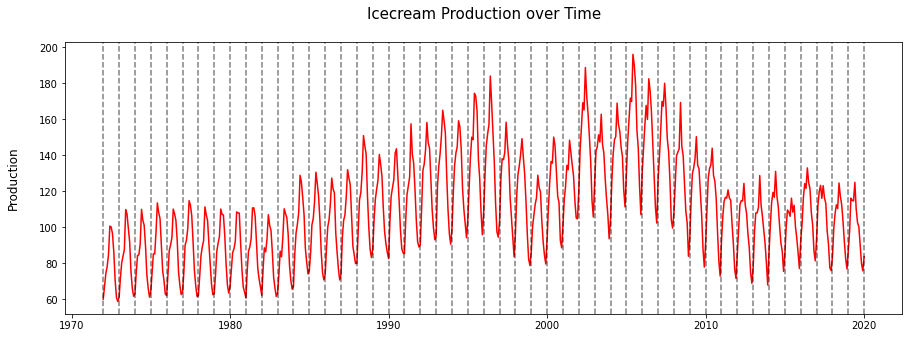

In [12]:
plt.figure(figsize = (15, 5))

plt.plot(df['Icecream'], color = 'red')

plt.title("Icecream Production over Time\n", fontsize = 15)
plt.ylabel("Production\n", fontsize = 12)

for i in range(1972, 2021):
    plt.axvline(pd.to_datetime(str(i) + '-01-01'), color = 'black', linestyle = '--', alpha = 0.5)
    
plt.show()

<a id =4.4> </a>
<br/>

#### 4.4. ACF Plot

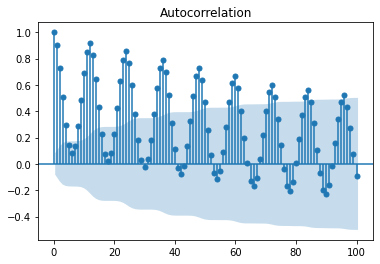

In [50]:
acf_plot = plot_acf(df.Icecream, lags = 100)

<a id =10> </a>
<font color=blue>Note:</font>  
<font color=purple>**1.** To observe the long-term effect, we will have to set the **lags** parameter a higher value.  
**2.** The**Blue shade area** is called the **Error Band**. Anything inside the error band isn't statistically significant.</font>

<a id =4.5> </a>
<br/>

#### Plot the PACF

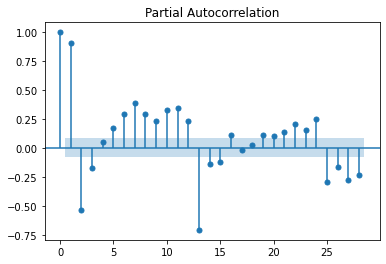

In [13]:
pacf_plot = plot_pacf(df.Icecream)

<a id =11> </a>
<font color=blue>Note:</font>  
<font color=purple> **1.** There's a strong lags at **1**. As it's just the time series with itself tha's why it will always be 1  
**2.** Based on PACF, we can build an Auto Regressive Model with lagged value **1**, **2**, **3**, **8** and **13**.</font>

<a id =5> </a>
<br/>
<br/>

## <font color=red>Important Notes</font>

**1.** If there is an **obvious trend** in the dataset, first we will have to **Detrend** it using differencing. Normally **One-lag differencing** is used in this regard.
<br/>

**2.** If there is no significant auto-correlation, then the series will be called **Random (White Noise)**. We will have to apply **differencing** before the analysis.
<br/>

**3.** If you find no significant auto-correlation even after the first **differencing**, then it will be called a **Random walk** and **AR** and **MA** can't be applied here. We will then have to go for other models for the analysis.